In [1]:
import numpy as np
import os
nx = 200
ny = 40
nz = 1
cwd = os.getcwd()
import matplotlib.pyplot as plt

In [2]:
print(cwd)

/home/cnchong/Codes/Ia_cumc3d


In [3]:
def donut_bool(xx,yy,R0,R1):
    dist = np.sqrt(xx**2+yy**2)
    bool0 = dist > R0
    bool1 = dist < R1
    return np.logical_and(bool0, bool1)

In [ ]:
# Face value
x1f = np.loadtxt(cwd+'/model/star/profile/hydro_x1_fgrid.dat').T
x2f = np.loadtxt(cwd+'/model/star/profile/hydro_x2_fgrid.dat').T
# Center value
x1f = x1f [3:-3] # Remove BC
x1c = (x1f[1:]+x1f[:-1])/2 #mid pt
x2f = x2f[3:-3] # Remove BC
x2c = (x2f[1:]+x2f[:-1])/2 #mid pt

rr, tt = np.meshgrid(x1c,x2c) # r and cos, spherical
yy = rr*np.cos(tt)
xx = rr*np.sin(tt)

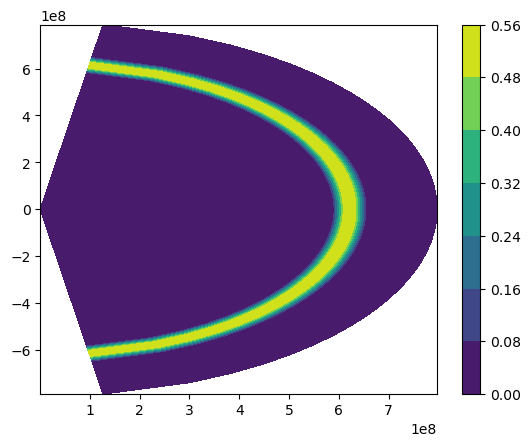

In [ ]:
# he4 ' 'c12 ' 'o16 ' 'ne20' 'mg24' 'si28' 'ni56'
R0 = 60e7 #inner radius
R1 = 65e7 #outer radius
Xiso_donut = np.zeros(rr.shape)
Xiso_donut[donut_bool(xx,yy,R0,R1)] = 0.5
dist = np.sqrt(xx**2+yy**2)
plt.contourf(xx,yy,Xiso_donut)
plt.colorbar()
np.savetxt(r'/home/cnchong/Codes/Ia_cumc3d/model/star/profile/spherical/Helm_XNi56.dat', Xiso_donut)